In [1]:
from sagas.nlu.ruleset_procs import list_words, cached_chunks
from sagas.conf.conf import cf
from sagas.tracker_jupyter import enable_jupyter_tracker
enable_jupyter_tracker()

# There are not many trees in the desert.
sents='Tidak banyak pohon di gurun.'
lang='id'
domain='root_domains'
chunks = cached_chunks(sents, lang, cf.engine(lang))
domains = chunks[domain]
domain=domains[0]
comps=[k for k,v in domain.items() if isinstance(v, list)]
print(domain['upos']=='NOUN')
all(c for c in comps if c.endswith('mod') or c in ('punct'))

True


True

✁ dependency-graph. -------------------------


,index,text,lemma,upos,xpos
0,1,Tidak,tidak,PART,G--
1,2,banyak,banyak,ADV,B--
2,3,pohon,pohon,NOUN,NSD
3,4,di,di,ADP,R--
4,5,gurun,gurun,NOUN,NSD
5,6,.,.,PUNCT,Z--


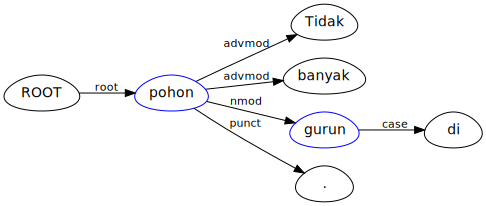

In [2]:
from sagas.nlu.uni_remote_viz import list_contrast, display_doc_deps
display_doc_deps(chunks['doc'], None)

In [2]:
from sagas.nlu.ruleset_procs import list_words, cached_chunks, get_main_domains
from sagas.conf.conf import cf
sents='I like to eat sweet corn.'
lang='en'
name, domains=get_main_domains(sents, lang, cf.engine(lang))
print(name)
domains

verb_domains


[{'index': 2,
  'text': 'like',
  'lemma': 'like',
  'upos': 'VERB',
  'xpos': 'VBP',
  'feats': 'Mood=Ind|Tense=Pres|VerbForm=Fin',
  'governor': 0,
  'dependency_relation': 'root',
  'entity': ['O'],
  'segments': [],
  'nsubj': [{'index': 1,
    'text': 'I',
    'lemma': 'I',
    'upos': 'PRON',
    'xpos': 'PRP',
    'feats': 'Case=Nom|Number=Sing|Person=1|PronType=Prs',
    'governor': 2,
    'dependency_relation': 'nsubj',
    'entity': ['O'],
    'segments': []}],
  'punct': [{'index': 7,
    'text': '.',
    'lemma': '.',
    'upos': 'PUNCT',
    'xpos': '.',
    'feats': '',
    'governor': 2,
    'dependency_relation': 'punct',
    'entity': ['O'],
    'segments': []}],
  'xcomp': [{'index': 4,
    'text': 'eat',
    'lemma': 'eat',
    'upos': 'VERB',
    'xpos': 'VB',
    'feats': 'VerbForm=Inf',
    'governor': 2,
    'dependency_relation': 'xcomp',
    'entity': ['O'],
    'segments': [],
    'obj': [{'index': 6,
      'text': 'corn',
      'lemma': 'corn',
      'upos': 

In [3]:
chunks = cached_chunks(sents, lang, cf.engine(lang))
chunks['doc'].as_json

[{'index': 1,
  'text': 'I',
  'lemma': 'I',
  'upos': 'PRON',
  'xpos': 'PRP',
  'feats': 'Case=Nom|Number=Sing|Person=1|PronType=Prs',
  'governor': 2,
  'dependency_relation': 'nsubj',
  'entity': ['O'],
  'segments': []},
 {'index': 2,
  'text': 'like',
  'lemma': 'like',
  'upos': 'VERB',
  'xpos': 'VBP',
  'feats': 'Mood=Ind|Tense=Pres|VerbForm=Fin',
  'governor': 0,
  'dependency_relation': 'root',
  'entity': ['O'],
  'segments': []},
 {'index': 3,
  'text': 'to',
  'lemma': 'to',
  'upos': 'PART',
  'xpos': 'TO',
  'feats': '',
  'governor': 4,
  'dependency_relation': 'mark',
  'entity': ['O'],
  'segments': []},
 {'index': 4,
  'text': 'eat',
  'lemma': 'eat',
  'upos': 'VERB',
  'xpos': 'VB',
  'feats': 'VerbForm=Inf',
  'governor': 2,
  'dependency_relation': 'xcomp',
  'entity': ['O'],
  'segments': []},
 {'index': 5,
  'text': 'sweet',
  'lemma': 'sweet',
  'upos': 'ADJ',
  'xpos': 'JJ',
  'feats': 'Degree=Pos',
  'governor': 6,
  'dependency_relation': 'amod',
  'entity

In [52]:
from sagas.nlu.features import get_feats_map, feats_map
from anytree import Node, RenderTree, AsciiStyle, Walker, Resolver
from anytree.importer import DictImporter
from pprint import pprint
sent=chunks['doc']
def get_feats_by_pos(sent, pos):
    ws = list(filter(lambda w: w.upos == pos, sent.words))
    return {'name':pos, 'children':[{'index': v.index, 
                                    'name': v.text,
                                    'children': [],
                                    **feats_map(v.feats)} for v in ws]}

data=get_feats_by_pos(sent, "VERB")
pprint(data)

importer = DictImporter()
tree_root = importer.import_(data)
# tree = RenderTree(tree_root)
# for pre, fill, node in tree:
#     print(node)
print(RenderTree(tree_root, style=AsciiStyle()).by_attr('name'))

{'children': [{'Mood': 'Ind',
               'Tense': 'Pres',
               'VerbForm': 'Fin',
               'children': [],
               'index': 2,
               'name': 'like'},
              {'VerbForm': 'Inf', 'children': [], 'index': 4, 'name': 'eat'}],
 'name': 'VERB'}
VERB
|-- like
+-- eat


In [40]:
from anytree.search import findall, findall_by_attr
v=findall(tree_root, filter_=lambda node: node.name in ("eat"))
v

(AnyNode(VerbForm='Inf', index=4, name='eat'),)

In [36]:
findall_by_attr(tree_root, value="Fin", name='VerbForm')

(AnyNode(Mood='Ind', Tense='Pres', VerbForm='Fin', index=2, name='like'),)

In [44]:
w = Walker()
w.walk(tree_root,v[0])

((), AnyNode(name='VERB'), (AnyNode(VerbForm='Inf', index=4, name='eat'),))

In [58]:
from sagas.nlu.nlu_tools import treeing
root=chunks['root_domains']
root

[{'index': 2,
  'text': 'like',
  'lemma': 'like',
  'upos': 'VERB',
  'xpos': 'VBP',
  'feats': 'Mood=Ind|Tense=Pres|VerbForm=Fin',
  'governor': 0,
  'dependency_relation': 'root',
  'entity': ['O'],
  'segments': [],
  'nsubj': [{'index': 1,
    'text': 'I',
    'lemma': 'I',
    'upos': 'PRON',
    'xpos': 'PRP',
    'feats': 'Case=Nom|Number=Sing|Person=1|PronType=Prs',
    'governor': 2,
    'dependency_relation': 'nsubj',
    'entity': ['O'],
    'segments': []}],
  'punct': [{'index': 7,
    'text': '.',
    'lemma': '.',
    'upos': 'PUNCT',
    'xpos': '.',
    'feats': '',
    'governor': 2,
    'dependency_relation': 'punct',
    'entity': ['O'],
    'segments': []}],
  'xcomp': [{'index': 4,
    'text': 'eat',
    'lemma': 'eat',
    'upos': 'VERB',
    'xpos': 'VB',
    'feats': 'VerbForm=Inf',
    'governor': 2,
    'dependency_relation': 'xcomp',
    'entity': ['O'],
    'segments': [],
    'obj': [{'index': 6,
      'text': 'corn',
      'lemma': 'corn',
      'upos': 

In [59]:
ds=treeing(root[0])
importer = DictImporter()
f = importer.import_(ds)
print(RenderTree(f, style=AsciiStyle()).by_attr(lambda n: f"{n.dependency_relation}: {n.text}"))

root: like
|-- nsubj: I
|-- punct: .
+-- xcomp: eat
    |-- obj: corn
    +-- mark: to


In [101]:
toks=findall_by_attr(f, name='dependency_relation', value='nsubj')
print(toks)
tok=toks[0]
tok.text, tok.parent.text, tok.parent.upos, \
    findall_by_attr(tok.parent, name='upos', value='NOUN')

(AnyNode(dependency_relation='nsubj', entity=['O'], feats='Case=Nom|Number=Sing|Person=1|PronType=Prs', governor=2, index=1, lemma='I', segments=[], text='I', upos='PRON', xpos='PRP'),)


('I',
 'like',
 'VERB',
 (AnyNode(dependency_relation='obj', entity=['O'], feats='Number=Sing', governor=4, index=6, lemma='corn', segments=[], text='corn', upos='NOUN', xpos='NN'),))

In [102]:
findall(f, filter_=lambda node: node.dependency_relation in ("obj"))

(AnyNode(dependency_relation='obj', entity=['O'], feats='Number=Sing', governor=4, index=6, lemma='corn', segments=[], text='corn', upos='NOUN', xpos='NN'),)

In [66]:
r = Resolver('dependency_relation')
r.get(f, "./xcomp/obj")

AnyNode(dependency_relation='obj', entity=['O'], feats='Number=Sing', governor=4, index=6, lemma='corn', segments=[], text='corn', upos='NOUN', xpos='NN')

In [89]:
rs=w.walk(r.get(f, './nsubj'), r.get(f, "./xcomp/obj"))
for i,node in enumerate(rs):
    print(i, [n.text for n in node] if isinstance(node, tuple) else node.text)
    # print(type(node))

0 ['I']
1 like
2 ['eat', 'corn']


In [64]:
r = Resolver('dependency_relation')
r.glob(f, "*comp")

[AnyNode(dependency_relation='xcomp', entity=['O'], feats='VerbForm=Inf', governor=2, index=4, lemma='eat', segments=[], text='eat', upos='VERB', xpos='VB')]

In [65]:
r.glob(f, "*/obj")

[AnyNode(dependency_relation='obj', entity=['O'], feats='Number=Sing', governor=4, index=6, lemma='corn', segments=[], text='corn', upos='NOUN', xpos='NN')]

In [8]:
verbs = list(filter(lambda w: w.upos == "NOUN", sent.words))
[(v.text,feats_map(v.feats)) for v in verbs]

[('corn', {'Number': 'Sing'})]

In [9]:
verbs = list(filter(lambda w: w.upos == "ADJ", sent.words))
[(v.text,feats_map(v.feats)) for v in verbs]

[('sweet', {'Degree': 'Pos'})]

In [46]:
from sagas.nlu.inspector_path import normal_path
from jsonpath_ng import jsonpath, parse
# from sagas.nlu.corenlp_parser import get_children_list, get_children

def index_for_path(path):
    prefix='$.'
    suffix='.index'
    parts=path.split('/')
    parts_str='.'.join([f"{t}[*]" for t in parts])
    return f"{prefix}{parts_str}{suffix}"

def get_index_with(domain_name, expr):    
    parser=parse(index_for_path(expr))
    # chunk=chunks['verb_domains'][0]
    for chunk in chunks[domain_name]:
        idx = '/'.join([match.value for match in parser.find(chunk)])
        if idx!='':
            return idx
    return None

def it_children_cl(sent, word, rs, clo):
    equals=lambda a, b: str(a) == str(b)
    for c in filter(lambda w: equals(w.governor, word.index), sent.words):
        rs.append((c.index, clo(c)))
        it_children_cl(sent, c, rs, clo)
        
def get_children_cl(sent, word, clo):
    rs = []
    it_children_cl(sent, word, rs, clo)    
    rs.append((word.index, clo(word)))
    # sort by word's index
    rs=sorted(rs, key=lambda _: int(_[0]))
    result = [w[1] for w in rs]
    return result

def get_chunk(domain_name, expr, clo=None): 
    idx=get_index_with(domain_name, expr)
    if clo is None:
        clo=lambda w: w.text
    if idx:
        sent_p=chunks['doc']
        root = next(w for w in sent_p.words if w.index==idx)
        # wlist=get_children_list(sent_p, root, include_self=True, stem=False)
        wlist=get_children_cl(sent_p, root, clo)
        return wlist
    return []

# 将各个domains作为索引树, 根据路径查找到指定结点的index, 再根据这个index在文档中进行查询
idx=get_index_with('verb_domains', expr='xcomp/obj')
if idx:
    print(idx)

6


In [12]:
sent_p=chunks['doc']
root = next(w for w in sent_p.words if w.index==idx)
root.as_json

{'index': '6',
 'text': 'corn',
 'lemma': 'corn',
 'upos': 'NOUN',
 'xpos': 'NN',
 'feats': 'Number=Sing',
 'governor': 4,
 'dependency_relation': 'obj'}

In [36]:
from sagas.nlu.corenlp_parser import get_children_list
get_children_list(sent_p, root, include_self=True, stem=False)

['sweet', 'corn']

In [47]:
get_chunk('verb_domains', expr='xcomp/obj')

['sweet', 'corn']

In [48]:
get_chunk('verb_domains', 'xcomp/obj', lambda w: w.upos)

['ADJ', 'NOUN']

In [50]:
get_chunk('verb_domains', 'xcomp/obj', lambda w: (w.text, w.upos.lower()))

[('sweet', 'adj'), ('corn', 'noun')]

In [25]:
get_chunk('verb_domains', expr='xcomp/unk')

[]

In [51]:
import json
json.dumps([('sweet', 'adj'), ('corn', 'noun')])

'[["sweet", "adj"], ["corn", "noun"]]'

In [2]:
from sagas.nlu.ruleset_procs import list_words, cached_chunks
sents='足にひどい痛みを感じました。'
lang='ja'

chunks = cached_chunks(sents, lang, 'knp')
doc=chunks['doc']
doc.as_json

[{'index': 1,
  'text': '足に',
  'lemma': '足',
  'upos': 'NOUN',
  'xpos': 'n_p',
  'feats': ['<文頭><ニ><助詞><体言><一文字漢字><係:ニ格><区切:0-0><格要素><連用要素><名詞項候補><先行詞候補><正規化代表表記:足/あし><解析格:ニ>'],
  'governor': 4,
  'dependency_relation': 'ニ',
  'entity': [],
  'segments': [{'index': 0,
    'upos': 'NOUN',
    'xpos': ['名詞', '普通名詞'],
    'text': '足',
    'lemmas': ['足', 'あし']},
   {'index': 1, 'upos': 'ADP', 'xpos': ['助詞', '格助詞'], 'text': 'に'}]},
 {'index': 2,
  'text': 'ひどい',
  'lemma': 'ひどい',
  'upos': 'ADJ',
  'xpos': 'j',
  'feats': ['<連体修飾><用言:形><係:連格><レベル:B-><区切:0-5><ID:（形判連体）><連体節><状態述語><正規化代表表記:ひどい/ひどい><用言代表表記:ひどい/ひどい><時制-現在><時制-無時制><格関係2:ガ:痛み><格解析結果:ひどい/ひどい:形1:ガ/N/痛み/2/0/17;ニ/U/-/-/-/-;ト/U/-/-/-/-;デ/U/-/-/-/-;カラ/U/-/-/-/-;ヨリ/U/-/-/-/-;マデ/U/-/-/-/-;ヘ/U/-/-/-/-;時間/U/-/-/-/-;外の関係/U/-/-/-/-;修飾/U/-/-/-/-;ノ/U/-/-/-/-;ガ２/U/-/-/-/-;ニヨル/U/-/-/-/-;ニクワエル/U/-/-/-/-;ニクラベル/U/-/-/-/-;トスル/U/-/-/-/-;ニツク/U/-/-/-/-;トイウ/U/-/-/-/-;ニカギル/U/-/-/-/->'],
  'governor': 3,
  'dependency_relation': 'ガ',
  'entity': [],
  

In [16]:
root = next(w for w in doc.words if w.dependency_relation in ('root', 'hed'))
tag_id=root.index-1
print(f"root: {tag_id}, {root.text}({root.upos})")
root_idx = int(root.index)
print([(w.index, w.lemma) for w in doc.words if w.governor == root_idx])

root: 3, 感じました。(VERB)
[(1, '足'), (3, '痛み')]


In [20]:
for pred in chunks['predicts']:
    print(pred['index'], type(pred['index']), pred['lemma'])

1 <class 'int'> ひどい
3 <class 'int'> 感じる


In [19]:
xs=[]
if xs:
    print(True)
else:
    print(False)

xs=None
if xs:
    print(True)
else:
    print(False)

False
False
